In [10]:
import numpy as np
from Face_Recognition import *
import os

In [ ]:
class Eigenfaces:
    def __init__(self):
        self.pca_compunant_dictionary={}
        
    def fit(self,images_dataset):
        flattened_data = np.reshape(images_dataset, (images_dataset.shape[0], -1))

        mean_image = np.mean(flattened_data, axis=0, dtype='float64')

        flatten_images_centroid = flattened_data - np.tile(mean_image, (images_dataset.shape[0], 1))
        coverance_matrix=(flatten_images_centroid.T@flatten_images_centroid)/(len(X)-1)
        # print(coverance_matrix.shape)
        print(coverance_matrix[0])
        
        eigenValues, eigenVectors = np.linalg.eig(coverance_matrix)
        print(eigenValues.shape)
        eigenValues_sum=sum(eigenValues)
        print(eigenValues_sum)
        used_eigenValues=[]
        self.used_eigenVectors=[]
        reached_sum=0
        for i,j in zip(eigenValues, eigenVectors):
            if(reached_sum<0.9*eigenValues_sum):
                used_eigenValues.append(i)
                self.used_eigenVectors.append(j)
                reached_sum+=i
            else:
                break
        for i,label in enumerate(y):
            self.pca_compunant_dictionary[label]=[]
            for vector in self.used_eigenVectors:
                weight=(np.reshape(resized_face, (resized_face.shape[0] * resized_face.shape[1])) - mean_image
                self.pca_compunant_dictionary[label].append(weight)
        print(self.pca_compunant_dictionary) 

    def predict(self, X):
        predictions = []
        for x in X:
            x_flat = x.flatten()
            value_weights = []
            for vector in self.used_eigenVectors:
                weight = (x_flat - self.mean_image) @ vector
                value_weights.append(weight)
            label_distance_dic = {}
            for label, weights in self.pca_compunant_dictionary.items():
                distance = np.sqrt(np.sum((np.array(weights) - np.array(value_weights)) ** 2))
                label_distance_dic[label] = distance
            sorted_dict = sorted(label_distance_dic.items(), key=lambda item: item[1])
            predictions.append(sorted_dict[0][0][:10])  # Take the top prediction
        return predictions
    
    def score(self, X, y):
        predictions = self.predict(X)
        correct = sum(1 for pred, true in zip(predictions, y) if pred[:10] == true[:10])
        return correct / len(y)
        

In [20]:
true_labels = {}
tru_labels = []
base_path = "./dataset/testing_set/dataSets/"
image_dataset = np.load('dataSets/images_dataset.npy')
class_labels = np.load('dataSets/class_labels.npy')
model_c=Eigenfaces()
model_c.fit()
eigenfaces, centered_data, mean_image = pca(image_dataset)
predictions = []

for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    label = 1 if int(folder_name[1:3]) <= 20 else 0
    print(int(folder_name[1:3]))
    if int(folder_name[1:3]) == 21:
       print("========================== Wrong Ones==============================================")
    for filename in os.listdir(folder_path):
      if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        image_path = os.path.join(folder_path, filename)
        true_labels[image_path] = label
        tru_labels.append(label)
    
        pred_label = recognize_face(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), eigenfaces, centered_data, mean_image, class_labels)
        if pred_label in ['Unknown', 'Not A Face']:
            pred_label = 0
        else:
            pred_label = 1
        predictions.append(pred_label)

(375, 2914)
1
(742.789294681955+0j)
(1206.8668120629563+0j)
(643.1182824764197+0j)
(1145.9870171913738+0j)
2
(759.4950107581058+0j)
(696.7603956216633+0j)
(910.4085188734895+0j)
(1075.429896352045+0j)
3
(960.6135137112531+0j)
(1067.7147514906676+0j)
Face not recognized. Minimum distance: (1355.8118066356524+0j)
(1177.279789219307+0j)
4
(443.20785401038046+0j)
(593.7263416382781+0j)
(343.633481781243+0j)
(380.6827861152361+0j)
5
(886.8999105173974+0j)
Face not recognized. Minimum distance: (1607.3390913781616+0j)
(1003.4029428813832+0j)
(635.3323328301614+0j)
6
(605.4492962966864+0j)
(730.3452012692679+0j)
(705.1431353607799+0j)
(411.19607659981875+0j)
7
(708.6345332766796+0j)
(1088.157729746735+0j)
(1014.9119965658385+0j)
(564.2587528370817+0j)
8
(716.9124894929653+0j)
(621.8952958888746+0j)
(832.9131242087514+0j)
(770.0627369779165+0j)
9
(1112.6774940873431+0j)
(1181.973993163094+0j)
(1205.047055457506+0j)
Face not recognized. Minimum distance: (1342.8133290551725+0j)
10
(1258.9292775

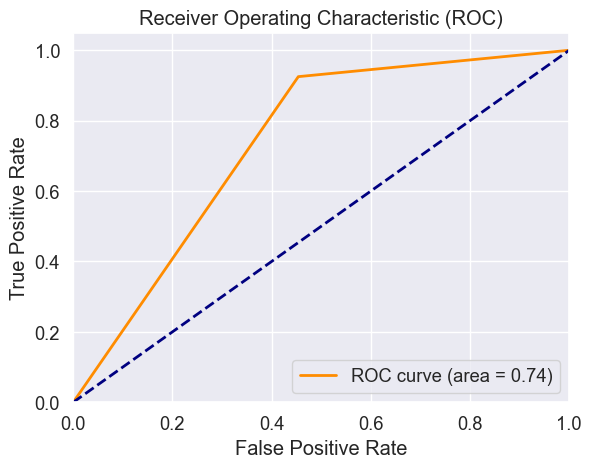

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(tru_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

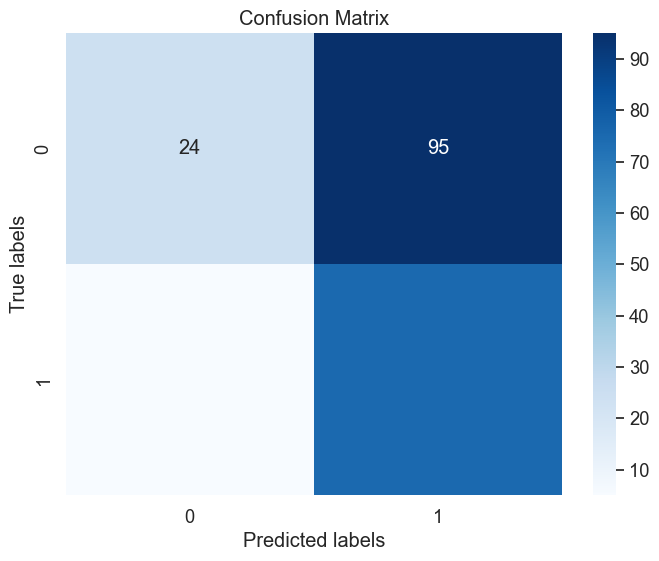

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(tru_labels, predictions)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
true_labels = {}
base_path = "./dataset/testing_set/dataSets/"
image_dataset = np.load('dataSets/images_dataset.npy')
class_labels = np.load('dataSets/class_labels.npy')
eigenfaces, centered_data, mean_image = pca(image_dataset)

all_predictions = []
all_true_label = []

for n_eigenface in [50, 100, 150, 200, 250]:
    tru_labels = []
    predictions = []
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        label = 1 if int(folder_name[1:3]) <= 20 else 0
        print(int(folder_name[1:3]))
        for filename in os.listdir(folder_path):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                image_path = os.path.join(folder_path, filename)
                true_labels[image_path] = label
                tru_labels.append(label)
            
                pred_label = recognize_face(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), eigenfaces, centered_data, mean_image, class_labels, num_eigenfaces=n_eigenface)
                if pred_label in ['Unknown', 'Not A Face']:
                    pred_label = 0
                else:
                    pred_label = 1
                predictions.append(pred_label)

    all_predictions.append(predictions)
    all_true_label.append(tru_labels)

(750, 2914)
1
(615.3345768761724+0j)
(1058.0141236981965+0j)
(533.6058548184114+0j)
(810.4810494168015+0j)
2
(691.1031321280536+0j)
(617.4486078028923+0j)
(788.494054462677+0j)


KeyboardInterrupt: 

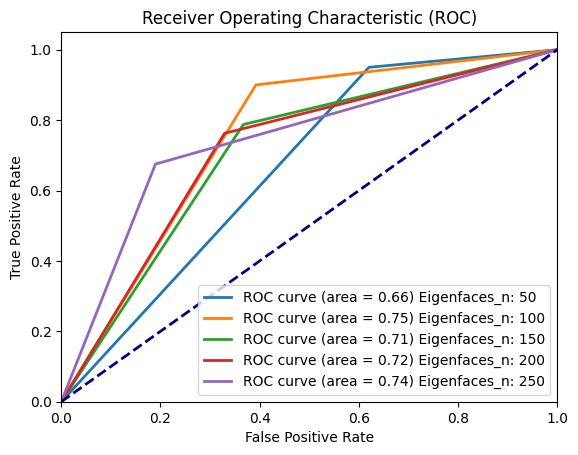

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

eigenfaces_n = ['50', '100', '150', '200', '250']
plt.figure()
for i, (true_labels, predictions) in enumerate(zip(all_true_label, all_predictions)):
    fpr, tpr, thresholds = roc_curve(true_labels, predictions)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f}) Eigenfaces_n: {eigenfaces_n[i]}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [2]:
tru_labels = []
base_path = "./dataset/testing_set/gt_db Half/"
image_dataset = np.load('./dataset/images_dataset.npy')
class_labels = np.load('./dataset/class_labels.npy')
eigenfaces, centered_data, mean_image = pca(image_dataset)
predictions = []

for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    for filename in os.listdir(folder_path):
      if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        image_path = os.path.join(folder_path, filename)
        tru_labels.append(folder_name.split('\\')[-1])
    
        pred_label = recognize_face(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), eigenfaces, centered_data, mean_image, class_labels)
        if pred_label in ['Unknown', 'Not A Face']:
            pred_label = '0'

        predictions.append(pred_label.split('\\')[-1])

        print("Tru Label  =========> ", tru_labels[-1])
        print("Prediction =========> ", predictions[-1])

(300, 2914)
(804.8175868938168+0j)
Tru Label  =========>  s01
Prediction =========>  s01
(1269.8423421736763+0j)
Tru Label  =========>  s01
Prediction =========>  s01
(684.7979463970016+0j)
Tru Label  =========>  s01
Prediction =========>  s01
(1198.439274228191+0j)
Tru Label  =========>  s01
Prediction =========>  s04
(828.334935491978+0j)
Tru Label  =========>  s02
Prediction =========>  s02
(760.4684769190569+0j)
Tru Label  =========>  s02
Prediction =========>  s02
(969.7394710763981+0j)
Tru Label  =========>  s02
Prediction =========>  s20
(1124.786099134265+0j)
Tru Label  =========>  s02
Prediction =========>  s02
(1035.4325502782165+0j)
Tru Label  =========>  s03
Prediction =========>  s03
(1139.8012168801235+0j)
Tru Label  =========>  s03
Prediction =========>  s03
Face not recognized. Minimum distance: (1412.398420606245+0j)
Tru Label  =========>  s03
Prediction =========>  0
(1271.214754961872+0j)
Tru Label  =========>  s03
Prediction =========>  s03
(496.3122010165898+0j)
Tr

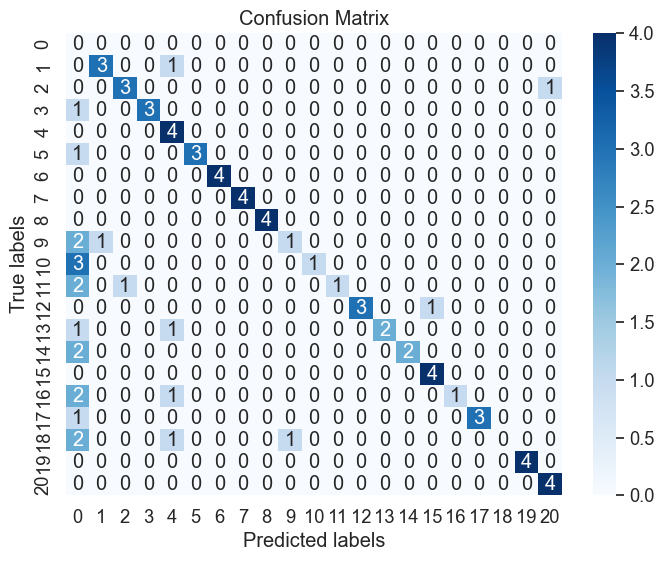

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(tru_labels, predictions)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [2]:
image_dataset = np.load('./dataset/images_dataset.npy')
class_labels = np.load('./dataset/class_labels.npy')
eigenfaces, centered_data, mean_image = pca(image_dataset)

predictions = []
true_labels = []
for folder_number in range(1, 41):
    folder_path = os.path.join("./dataset/testing_set/ORL Database/", str(folder_number))    
    if os.path.exists(folder_path):
        image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            pred_label = recognize_face(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), eigenfaces, centered_data, mean_image, class_labels)
            if pred_label in ['Unknown', 'Not A Face']:
                pred_label = '0'
            print("Prediction ======>", pred_label.split('\\')[-1])
            print("True Label ======>", folder_number)
            predictions.append(pred_label.split('\\')[-1])
            true_labels.append(folder_number)
    else:
        print("Folder", folder_number, "does not exist.")

Prediction ======> 40
True Label ======> 1
Prediction ======> 1
True Label ======> 1
Prediction ======> 0
True Label ======> 2
Prediction ======> 2
True Label ======> 2
Prediction ======> 13
True Label ======> 3
Prediction ======> 4
True Label ======> 3
Prediction ======> 4
True Label ======> 4
Prediction ======> 0
True Label ======> 4
Prediction ======> 5
True Label ======> 5
Prediction ======> 40
True Label ======> 5
Prediction ======> 6
True Label ======> 6
Prediction ======> 6
True Label ======> 6
Prediction ======> 7
True Label ======> 7
Prediction ======> 7
True Label ======> 7
Prediction ======> 8
True Label ======> 8
Prediction ======> 8
True Label ======> 8
Prediction ======> 9
True Label ======> 9
Prediction ======> 9
True Label ======> 9
Prediction ======> 10
True Label ======> 10
Prediction ======> 0
True Label ======> 10
Prediction ======> 11
True Label ======> 11
Prediction ======> 11
True Label ======> 11
Prediction ======> 12
True Label ======> 12
Prediction ======> 12


In [3]:
correct = 0
for i in range(len(predictions)):
    if int(predictions[i]) == int(true_labels[i]):
        correct += 1

correct, (correct / len(predictions)) * 100

(62, 77.5)

In [4]:
true_labels = {}
tru_labels = []
base_path = "./dataset/testing_set/gt_db/"
image_dataset = np.load('./dataset/images_dataset.npy')
class_labels = np.load('./dataset/class_labels.npy')
eigenfaces, centered_data, mean_image = pca(image_dataset)
predictions = []

tp = 0
tn =0
fp =0
fn =0

tpr_values = []
fpr_values = []

for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    label = 1 if int(folder_name[1:3]) <= 20 else 0
    print(int(folder_name[1:3]))
    if int(folder_name[1:3]) == 21:
       print("========================== Wrong Ones==============================================")
    for filename in os.listdir(folder_path):
      if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        image_path = os.path.join(folder_path, filename)
        true_labels[image_path] = label
        tru_labels.append(label)
    
        pred_label = recognize_face(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), eigenfaces, centered_data, mean_image, class_labels)
        if pred_label in ['Unknown', 'Not A Face']:
            pred_label = 0
        else:
            pred_label = 1
        
        predictions.append(pred_label)
        
        if label == 0:
           if pred_label == 1:
                fp = fp + 1
           elif pred_label == 0:
                tn = tn + 1
        elif label == 1:
            if pred_label == 1:
                tp = tp + 1
            elif pred_label == 0:
                fn = fn + 1
                
        print(tp,tn,fp,fn)

        if (tp+fn) !=0 :
            tpr = tp/(tp+fn)
        elif (tp+fn) == 0:
            tpr = 0
        
        if (fp+tn) !=0 :
            fpr = fp/(fp+tn)
        elif (fp+tn) == 0:
            fpr = 0

        tpr_values.append(tpr)
        fpr_values.append(fpr)

(300, 2914)
1
(738.4902717737447+0j)
1 0 0 0
(1193.8151678495528+0j)
2 0 0 0
(634.654058005412+0j)
3 0 0 0
(1149.7115176726468+0j)
4 0 0 0
2
(765.4534749143246+0j)
5 0 0 0
(694.136081874809+0j)
6 0 0 0
(902.7812466466231+0j)
7 0 0 0
(1083.805134175402+0j)
8 0 0 0
3
(970.903565742951+0j)
9 0 0 0
(1092.7166556586874+0j)
10 0 0 0
Face not recognized. Minimum distance: (1353.3758015594572+0j)
10 0 0 1
(1200.0065748163456+0j)
11 0 0 1
4
(435.7499981538236+0j)
12 0 0 1
(591.0285412756707+0j)
13 0 0 1
(351.0597377336596+0j)
14 0 0 1
(382.74839064756355+0j)
15 0 0 1
5
(882.9577152047635+0j)
16 0 0 1
Face not recognized. Minimum distance: (1598.888757979556+0j)
16 0 0 2
(1040.0871312285146+0j)
17 0 0 2
(623.2334364089079+0j)
18 0 0 2
6
(580.5276797055395+0j)
19 0 0 2
(717.9599748276514+0j)
20 0 0 2
(706.808201062329+0j)
21 0 0 2
(404.0617045753756+0j)
22 0 0 2
7
(718.648878627584+0j)
23 0 0 2
(1096.5266517045166+0j)
24 0 0 2
(1041.1125780229152+0j)
25 0 0 2
(575.2165988471221+0j)
26 0 0 2
8
(72

In [6]:
num_images = tp + tn + fp +fn
        
FMR = fp/num_images
FNMR = fn/num_images           
accuracy = (tp+tn) / num_images
precision = tp/(tp+fp)
specificity = tn/(tn+fn)


print('fpr = {} \t'.format(FMR),end= ' ')
print('accuracy = {} \t'.format(accuracy),end= ' ')
print('precision = {} \t'.format(precision),end= ' ')
print('specificity = {} \t'.format(specificity))

fpr = 0.1949685534591195 	 accuracy = 0.7547169811320755 	 precision = 0.6990291262135923 	 specificity = 0.8571428571428571 	
